In [26]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

## Import Library

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import time
from models.ffnn import FFNN

## Load Dataset

In [28]:
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype(float)
y = y.astype(int)

## Preprocessing

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
X = X / 255.0

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

## Experiment 1
Jumlah Hidden Layer = 2,
Jumlah Neuron = 32


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6581
Epoch 2/10, Train Loss: 0.3125
Epoch 3/10, Train Loss: 0.2669
Epoch 4/10, Train Loss: 0.2370
Epoch 5/10, Train Loss: 0.2136
Epoch 6/10, Train Loss: 0.1949
Epoch 7/10, Train Loss: 0.1791
Epoch 8/10, Train Loss: 0.1662
Epoch 9/10, Train Loss: 0.1541
Epoch 10/10, Train Loss: 0.1442
Custom FFNN training time: 15.08 seconds
Accuracy: 0.9526428571428571


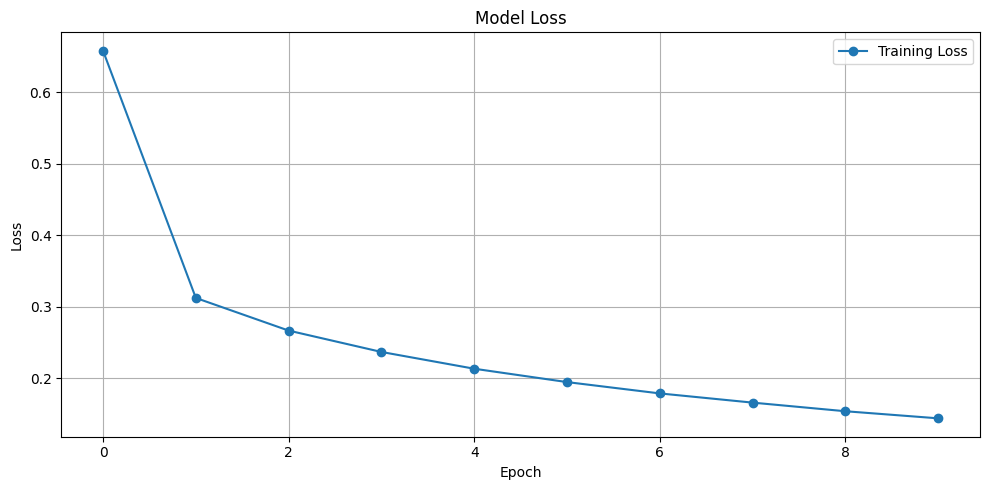

{'train_loss': [0.6580886621587477,
  0.3124862744731669,
  0.2668778863365151,
  0.23700227748917443,
  0.2135605748026143,
  0.19489277234760283,
  0.17905138278335248,
  0.16618826182814384,
  0.15413677393116346,
  0.1442173896450411],
 'val_loss': []}

In [33]:
input_size = 784
hidden_sizes = [32, 32] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)

## Experiment 2
Jumlah Hidden Layer = 2,
Jumlah Neuron = 64


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5853
Epoch 2/10, Train Loss: 0.2792
Epoch 3/10, Train Loss: 0.2308
Epoch 4/10, Train Loss: 0.1996
Epoch 5/10, Train Loss: 0.1771
Epoch 6/10, Train Loss: 0.1600
Epoch 7/10, Train Loss: 0.1458
Epoch 8/10, Train Loss: 0.1331
Epoch 9/10, Train Loss: 0.1232
Epoch 10/10, Train Loss: 0.1145
Custom FFNN training time: 38.43 seconds
Accuracy: 0.9599285714285715


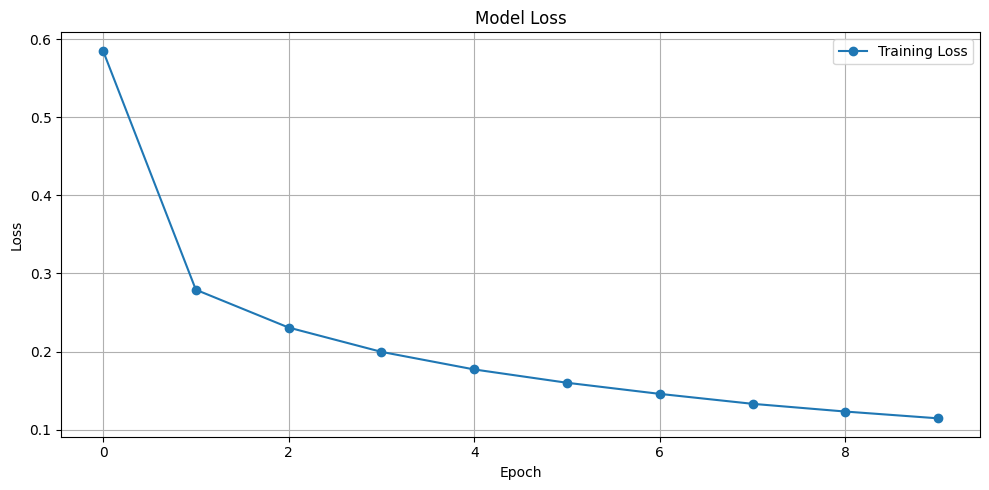

{'train_loss': [0.5852866391620957,
  0.27918940590718183,
  0.2307639111627446,
  0.19962057109548953,
  0.17710331612046584,
  0.16004708226278508,
  0.14580204640537092,
  0.1330784709127856,
  0.12318679974177667,
  0.11449675781234638],
 'val_loss': []}

In [34]:
input_size = 784
hidden_sizes = [64, 64] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)

## Experiment 3
Jumlah Hidden Layer = 2,
Jumlah Neuron = 128


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5797
Epoch 2/10, Train Loss: 0.2837
Epoch 3/10, Train Loss: 0.2307
Epoch 4/10, Train Loss: 0.1960
Epoch 5/10, Train Loss: 0.1713
Epoch 6/10, Train Loss: 0.1528
Epoch 7/10, Train Loss: 0.1384
Epoch 8/10, Train Loss: 0.1262
Epoch 9/10, Train Loss: 0.1159
Epoch 10/10, Train Loss: 0.1071
Custom FFNN training time: 80.30 seconds
Accuracy: 0.962


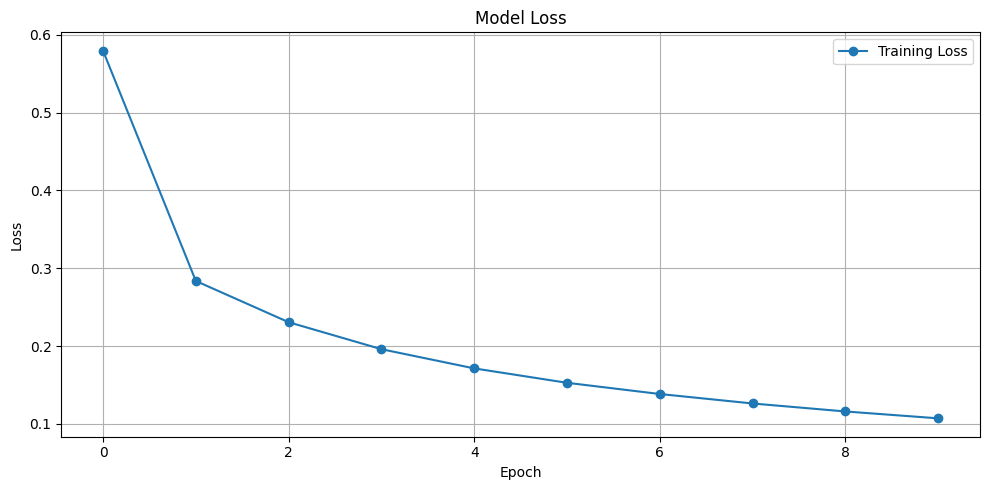

{'train_loss': [0.5796942503894613,
  0.28367584155392167,
  0.2306868273219572,
  0.1959994424447852,
  0.1713079915740453,
  0.15279571243503373,
  0.13837990857171542,
  0.12619715481554392,
  0.11593940137101856,
  0.10710688760777776],
 'val_loss': []}

In [35]:
input_size = 784
hidden_sizes = [128, 128] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)

## Experiment 4
Jumlah Hidden Layer = 1,
Jumlah Neuron = 64


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6843
Epoch 2/10, Train Loss: 0.3504
Epoch 3/10, Train Loss: 0.3004
Epoch 4/10, Train Loss: 0.2699
Epoch 5/10, Train Loss: 0.2464
Epoch 6/10, Train Loss: 0.2269
Epoch 7/10, Train Loss: 0.2110
Epoch 8/10, Train Loss: 0.1968
Epoch 9/10, Train Loss: 0.1849
Epoch 10/10, Train Loss: 0.1745
Custom FFNN training time: 40.08 seconds
Accuracy: 0.9495714285714286


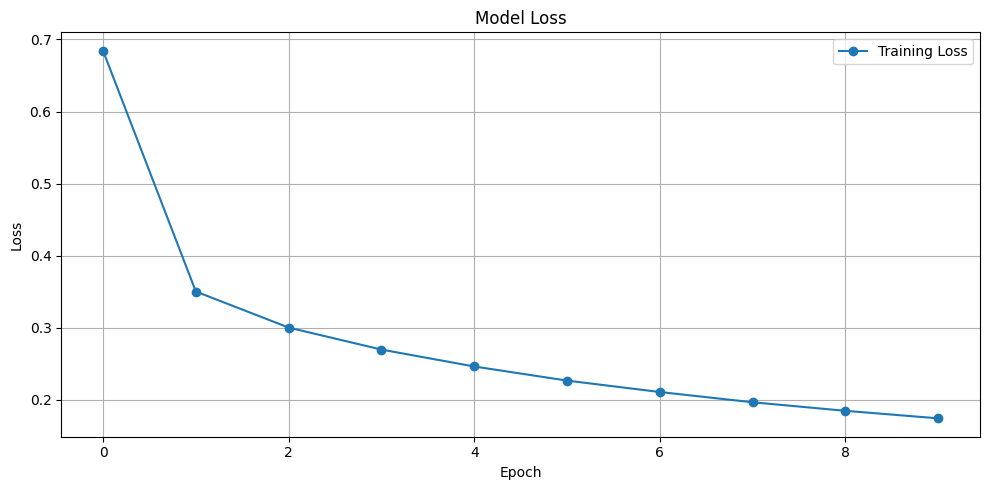

{'train_loss': [0.6843023260573832,
  0.3503700927259049,
  0.30039940391402337,
  0.2698609659250844,
  0.2464185560140477,
  0.22685078757032906,
  0.2110062252676677,
  0.19679487012108182,
  0.18492754710522763,
  0.1745069738711691],
 'val_loss': []}

In [36]:
input_size = 784
hidden_sizes = [64] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)

## Experiment 5
Jumlah Hidden Layer = 2,
Jumlah Neuron = 64


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6138
Epoch 2/10, Train Loss: 0.2928
Epoch 3/10, Train Loss: 0.2434
Epoch 4/10, Train Loss: 0.2128
Epoch 5/10, Train Loss: 0.1889
Epoch 6/10, Train Loss: 0.1707
Epoch 7/10, Train Loss: 0.1554
Epoch 8/10, Train Loss: 0.1436
Epoch 9/10, Train Loss: 0.1330
Epoch 10/10, Train Loss: 0.1239
Custom FFNN training time: 14.00 seconds
Accuracy: 0.9565714285714285


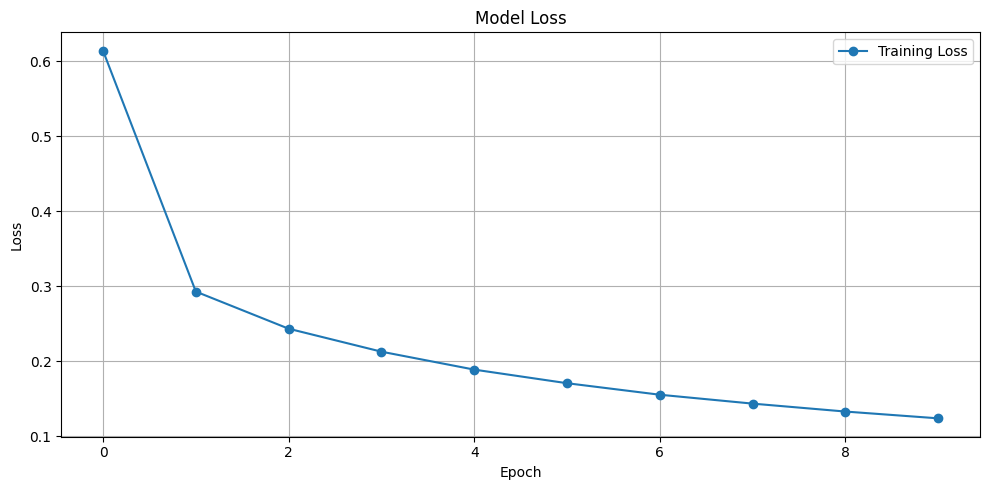

{'train_loss': [0.6138382185872849,
  0.29284447875333114,
  0.24337955286049803,
  0.2127683644613224,
  0.18887072138510336,
  0.17074939144231646,
  0.15539627400698539,
  0.14355097808253736,
  0.13297850072848144,
  0.12393636273584087],
 'val_loss': []}

In [37]:
input_size = 784
hidden_sizes = [64, 64] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)

## Experiment 6
Jumlah Hidden Layer = 3,
Jumlah Neuron = 64


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5457
Epoch 2/10, Train Loss: 0.2426
Epoch 3/10, Train Loss: 0.1919
Epoch 4/10, Train Loss: 0.1614
Epoch 5/10, Train Loss: 0.1415
Epoch 6/10, Train Loss: 0.1258
Epoch 7/10, Train Loss: 0.1129
Epoch 8/10, Train Loss: 0.1019
Epoch 9/10, Train Loss: 0.0930
Epoch 10/10, Train Loss: 0.0846
Custom FFNN training time: 17.30 seconds
Accuracy: 0.9620714285714286


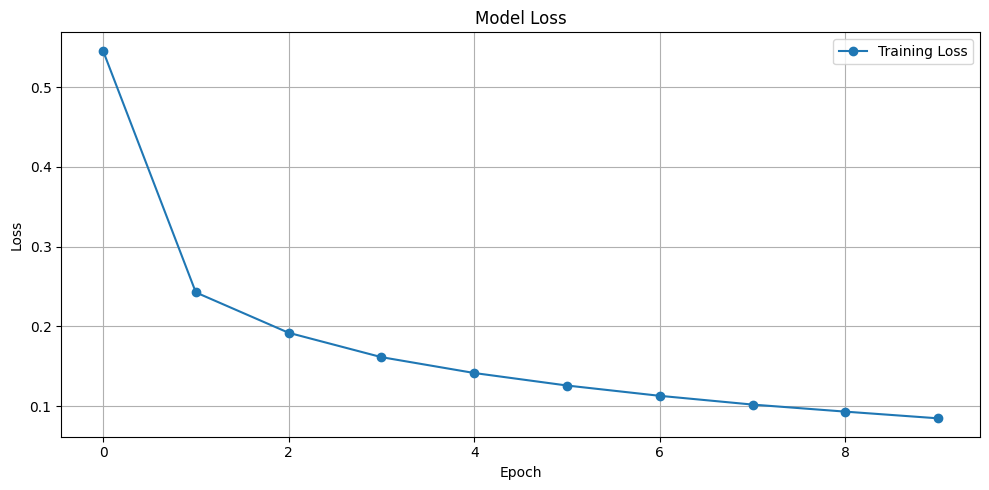

{'train_loss': [0.5457239939466114,
  0.2425818395306956,
  0.19193807962120982,
  0.1613726027173442,
  0.14148965160419444,
  0.12579408234425987,
  0.11286345815763098,
  0.10188656008761474,
  0.09303327758183565,
  0.08463275979221611],
 'val_loss': []}

In [38]:
input_size = 784
hidden_sizes = [64, 64, 64] 
output_size = 10

ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)